<a href="https://colab.research.google.com/github/Ester-Taniya/DI-Bootcamp/blob/main/Week7/Day2/Daily_Challenge/Daily_Challenge_w7_d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd


# Set up Selenium WebDriver with ChromeOptions
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--no-sandbox')


# Create WebDriver using ChromeOptions
driver = webdriver.Chrome(options=chrome_options)


url = "https://www.bbc.com/weather/293397"
driver.get(url)

In [34]:
wait= WebDriverWait(driver, 10)
wait.until(EC.visibility_of_element_located((By.CLASS_NAME,'wr-day-temperature')))
wait.until(EC.visibility_of_element_located((By.CLASS_NAME,'wr-day__title')))

<selenium.webdriver.remote.webelement.WebElement (session="03670394547e4f476c8f22a9691f8708", element="E52D47DFDF67519E83DA4A6A9D5E73BD_element_72")>

In [35]:
temperature_elements=driver.find_elements(By.CLASS_NAME,'wr-day-temperature')
date_elements=driver.find_elements(By.CLASS_NAME,'wr-day__title')

In [36]:
weather_data = []

for date_element, temperature_element in zip(date_elements, temperature_elements):
    date_text = date_element.find_element(By.CLASS_NAME,'wr-date').text
    temperature_text = temperature_element.find_element(By.CLASS_NAME,'wr-value--temperature--c').text
    date_text = date_element.find_element(By.CLASS_NAME,'wr-date').text
    weather_data.append({'date':date_text, 'temperature': temperature_text})



In [37]:
driver.quit()

In [38]:
for entry in weather_data :
  print(entry)

{'date': 'Today', 'temperature': '16°'}
{'date': 'Mon 29th', 'temperature': '15°'}
{'date': 'Tue 30th', 'temperature': '15°'}
{'date': 'Wed 31st', 'temperature': '14°'}
{'date': 'Thu 1st', 'temperature': '14°'}
{'date': 'Fri 2nd', 'temperature': '16°'}
{'date': 'Sat 3rd', 'temperature': '17°'}
{'date': 'Sun 4th', 'temperature': '18°'}
{'date': 'Mon 5th', 'temperature': '18°'}
{'date': 'Tue 6th', 'temperature': '19°'}
{'date': 'Wed 7th', 'temperature': '19°'}
{'date': 'Thu 8th', 'temperature': '19°'}
{'date': 'Fri 9th', 'temperature': '19°'}
{'date': 'Sat 10th', 'temperature': '20°'}


In [45]:
data=[
    {'date': 'Today', 'temperature': 16},
{'date': 'Mon 29th', 'temperature': 15},
{'date': 'Tue 30th', 'temperature': 15},
{'date': 'Wed 31st', 'temperature': 14},
{'date': 'Thu 1st', 'temperature': 14},
{'date': 'Fri 2nd', 'temperature': 16},
{'date': 'Sat 3rd', 'temperature': 17},
{'date': 'Sun 4th', 'temperature': 18},
{'date': 'Mon 5th', 'temperature': 18},
{'date': 'Tue 6th', 'temperature': 19},
{'date': 'Wed 7th', 'temperature': 19},
{'date': 'Thu 8th', 'temperature': 19},
{'date': 'Fri 9th', 'temperature': 19},
{'date': 'Sat 10th', 'temperature': 19}
]


In [46]:
df = pd.DataFrame(data)
df

,date,temperature
0,Today,16
1,Mon 29th,15
2,Tue 30th,15
3,Wed 31st,14
4,Thu 1st,14
5,Fri 2nd,16
6,Sat 3rd,17
7,Sun 4th,18
8,Mon 5th,18
9,Tue 6th,19


In [50]:
total_temp=sum(day['temperature']for day in data)
average_temp = total_temp/len(data)

# Print the results
print('Average temperature:', average_temp)

Average temperature: 17.0


In [53]:
temperature_trend="increasing" if data[-1]['temperature']> data[0]['temperature'] else "decreasing"
print('Temperature trend is :', temperature_trend)

Temperature trend is : increasing


In [56]:
max_temperature = max(day['temperature']for day in data)
min_temperature = min(day['temperature']for day in data)
print('Max temperature:', max_temperature)
print('Min temperature:', min_temperature)


Max temperature: 19
Min temperature: 14


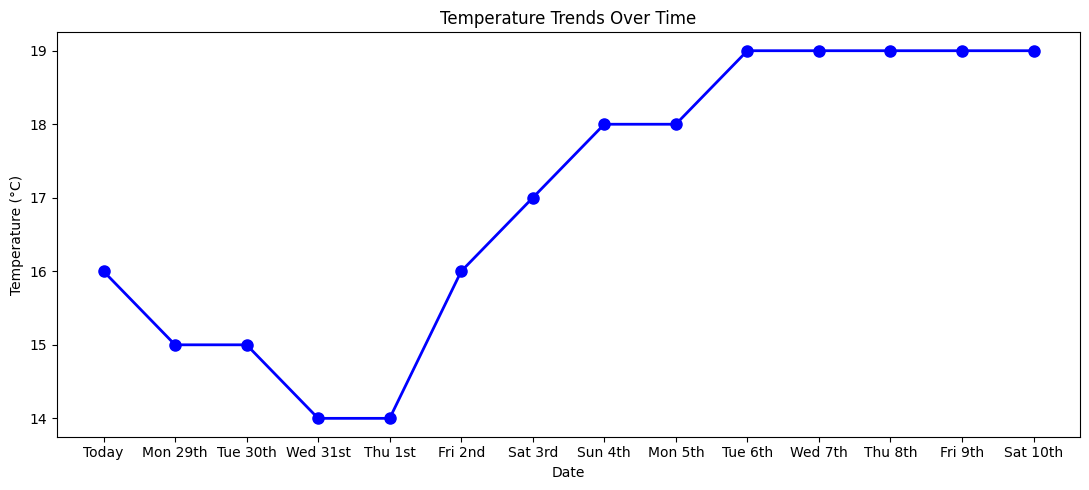

In [65]:

import matplotlib.pyplot as plt

dates = [day['date'] for day in data]
temperatures = [day['temperature'] for day in data]
plt.figure(figsize=(11, 5))
plt.plot(dates, temperatures, marker='o', color='b', linestyle='-', linewidth=2, markersize=8, label='Temperature')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.tight_layout()

plt.show()


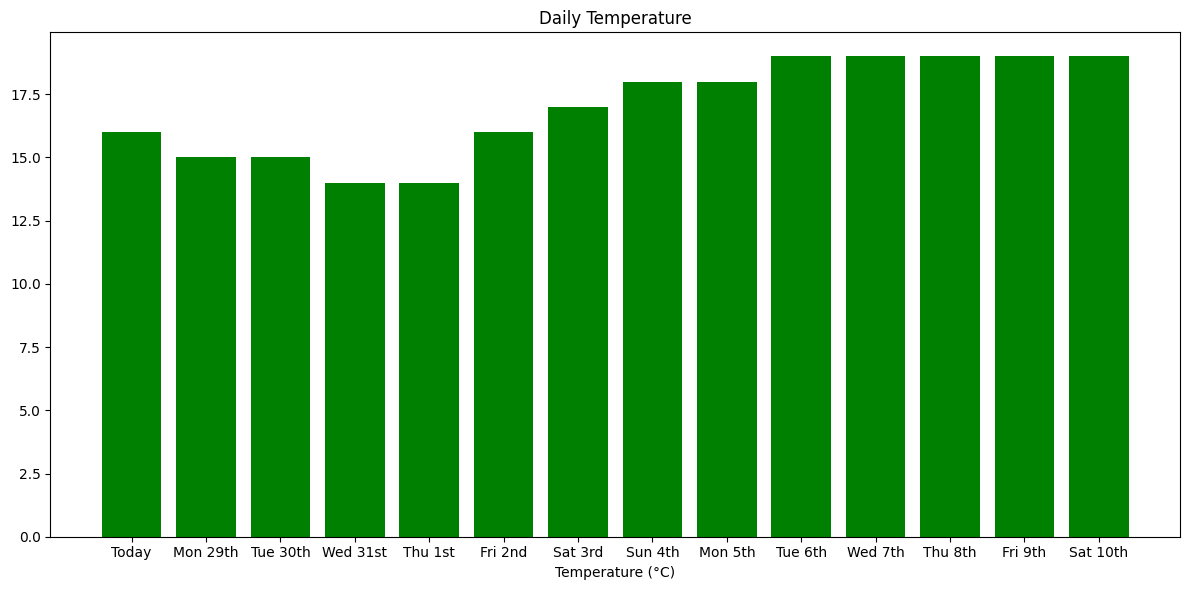

In [72]:
import matplotlib.pyplot as plt

# Assuming 'data' is a list of dictionaries with 'date' and 'temperature' keys
temperatures = [day['temperature'] for day in data]


# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(dates, temperatures, color='green', label='Bar Plot')


plt.title('Daily Temperature')
plt.xlabel('Temperature (°C)')

plt.tight_layout()
plt.show()
